- init pos
  - random
  - アルキメデス
  - circular
- seed固定せずにSS, FRで100-1000個つくる

1. 初期配置を用意
2. 等高線みたいなやつ出す
3. seedの影響を調べる


In [1]:
from uuid import uuid4

UUID = str(uuid4())
# UUID = '5d6aa3f7-5675-45ab-a056-f43a14b637dc'
# UUID = 'empirical_params_5d6aa3f7-5675-45ab-a056-f43a14b637dc'
# UUID = 'num_of_p=50,num_of_i=50,eps=0.1_25f8f65d-84a7-4528-acbd-91546ddef2cf'
UUID = 'num_of_p=25,num_of_i=100,eps=0.1_20f2d302-7e51-42a8-90b2-acb5343b51ec'

In [2]:
from config import paths

DATASET_NAME = "USpowerGrid"
EDGE_WEIGHT = 30
EXPORT_DIR = (
    paths.get_project_root_path()
    .joinpath("data")
    .joinpath("experiments")
    .joinpath("initial_placement")
    .joinpath(UUID)
)
N_INIT_POS = 100
FIXED_SEED = 0
NAME_ABBREVIATIONS = {
    "angular_resolution": "ANR",
    "aspect_ratio": "AR",
    "crossing_angle": "CA",
    "crossing_number": "CN",
    "gabriel_graph_property": "GB",
    "ideal_edge_lengths": "IE",
    "node_resolution": "NR",
    "run_time": "RT",
    "neighborhood_preservation": "NP",
    "stress": "ST",
}

In [3]:
from config import paths
from utils import graph
from tqdm import tqdm
import pandas as pd
import networkx as nx

EXPORT_DIR.mkdir(parents=True, exist_ok=True)
dataset_path = paths.get_dataset_path(dataset_name=DATASET_NAME)
nx_graph = graph.load_nx_graph(
    dataset_name=DATASET_NAME, edge_weight=EDGE_WEIGHT
)


In [4]:
# # circular
# method_name = "circular"
# export_dir = EXPORT_DIR.joinpath(method_name)
# export_dir.mkdir(parents=True, exist_ok=True)
# df = pd.DataFrame()
# for _ in tqdm(range(N_INIT_POS)):
#     pos_id = str(uuid4())
#     pos = nx.circular_layout(nx_graph)
#     df = pd.concat(
#         [
#             df,
#             pd.DataFrame(
#                 [
#                     {
#                         "id": pos_id,
#                         "pos": pos,
#                         "method": method_name,
#                         "dataset_name": DATASET_NAME,
#                     }
#                 ]
#             ),
#         ]
#     )

# df.to_pickle(export_dir.joinpath(f"{DATASET_NAME}.pkl"))


In [5]:
# nx.draw(nx_graph, pos, node_size=5)

In [6]:
# df

In [7]:
# random
method_name = "random"
export_dir = EXPORT_DIR.joinpath(method_name)
export_dir.mkdir(parents=True, exist_ok=True)
df = pd.DataFrame()
for _ in tqdm(range(N_INIT_POS)):
    pos_id = str(uuid4())
    pos = nx.random_layout(nx_graph)
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [
                    {
                        "id": pos_id,
                        "pos": pos,
                        "method": method_name,
                        "dataset_name": DATASET_NAME,
                    }
                ]
            ),
        ]
    )

df.to_pickle(export_dir.joinpath(f"{DATASET_NAME}.pkl"))


100%|██████████| 100/100 [00:00<00:00, 475.25it/s]


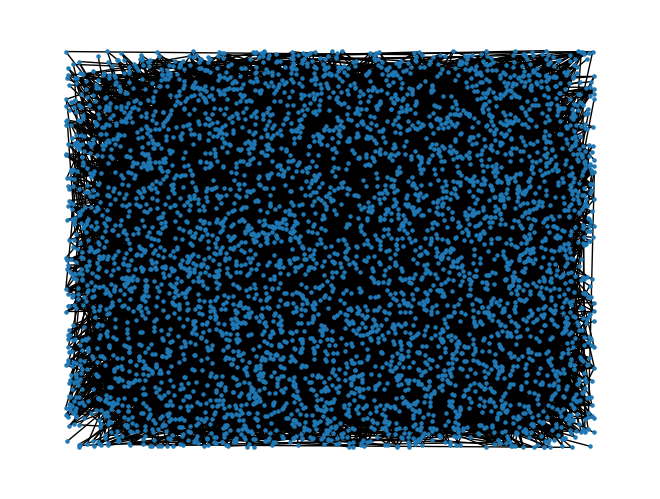

In [8]:
nx.draw(nx_graph, pos, node_size=5)

In [9]:
df

,id,pos,method,dataset_name
0,3aa04b6d-fd26-4c9a-b4f1-34471b656490,"{'3553': [0.33086148, 0.680773], '1': [0.18348...",random,USpowerGrid
0,3ac4a617-6c0b-4da0-a97d-546308424a56,"{'3553': [0.8318869, 0.6054245], '1': [0.28974...",random,USpowerGrid
0,5ab943f6-3325-4c7f-83ff-9eac88d373fc,"{'3553': [0.1514289, 0.044770118], '1': [0.569...",random,USpowerGrid
0,06478ddb-5654-4fca-82bd-bf17ce723376,"{'3553': [0.17252758, 0.41682956], '1': [0.380...",random,USpowerGrid
0,c3b6ff65-f6f1-445d-ae90-4c3458d1fb7d,"{'3553': [0.7733069, 0.767822], '1': [0.346752...",random,USpowerGrid
...,...,...,...,...
0,e0b57472-d0a4-4df9-9820-84cd8e0d2ff0,"{'3553': [0.49743295, 0.07945732], '1': [0.471...",random,USpowerGrid
0,45daf2ff-16d1-44e1-9827-7c04ef2439e6,"{'3553': [0.3661239, 0.58109206], '1': [0.1748...",random,USpowerGrid
0,a972403d-bbbf-4403-a1aa-a25de422951d,"{'3553': [0.99436283, 0.2751237], '1': [0.5658...",random,USpowerGrid
0,e97be7a7-6e19-4ef7-9cec-6374485a75f4,"{'3553': [0.85047346, 0.24032584], '1': [0.519...",random,USpowerGrid


In [10]:
# archimedes
from generators import graph
from egraph import Coordinates, Graph, warshall_floyd
from uuid import uuid4
import random

method_name = "archimedes"
export_dir = EXPORT_DIR.joinpath(method_name)
export_dir.mkdir(parents=True, exist_ok=True)

eg_graph, eg_indices = graph.egraph_graph(nx_graph=nx_graph)
eg_distance_matrix = warshall_floyd(eg_graph, lambda _: EDGE_WEIGHT)

df = pd.DataFrame()
for _ in tqdm(range(N_INIT_POS)):
    pos_id = str(uuid4())

    shuffled_nodes = random.sample(list(nx_graph.nodes), len(nx_graph.nodes))
    eg_graph = Graph()
    eg_indices = {}
    for u in shuffled_nodes:
        eg_indices[u] = eg_graph.add_node(u)
    for u, v in nx_graph.edges:
        eg_graph.add_edge(eg_indices[u], eg_indices[v], (u, v))

    eg_drawing = Coordinates.initial_placement(eg_graph)
    pos = {
        u: (eg_drawing.x(i), eg_drawing.y(i)) for u, i in eg_indices.items()
    }

    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [
                    {
                        "id": pos_id,
                        "pos": pos,
                        "method": method_name,
                        "dataset_name": DATASET_NAME,
                    }
                ]
            ),
        ]
    )

df.to_pickle(export_dir.joinpath(f"{DATASET_NAME}.pkl"))


100%|██████████| 100/100 [00:02<00:00, 47.50it/s]


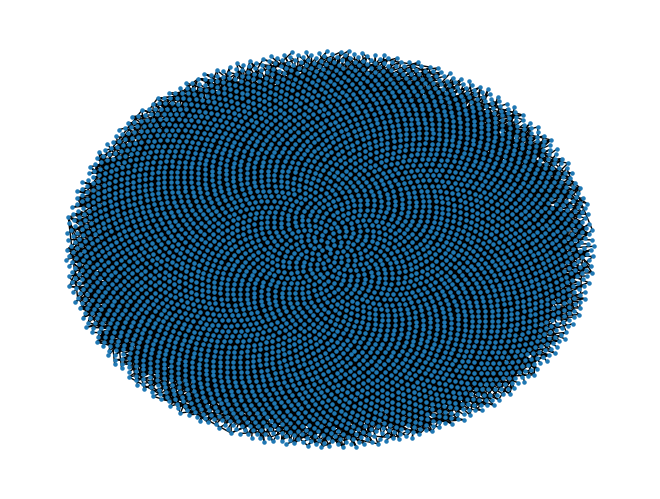

In [11]:
nx.draw(nx_graph, pos, node_size=5)

In [12]:
df

,id,pos,method,dataset_name
0,9bee18e3-cc20-4a0b-a171-8e1b66846aae,"{'825': (0.0, 0.0), '2951': (-7.37368822097778...",archimedes,USpowerGrid
0,a70ed662-eac9-4747-9370-97c643201487,"{'4750': (0.0, 0.0), '1798': (-7.3736882209777...",archimedes,USpowerGrid
0,d35e36e5-ef04-4e31-92e2-16d8ee49c94c,"{'4318': (0.0, 0.0), '4645': (-7.3736882209777...",archimedes,USpowerGrid
0,19300411-5d18-4907-89a5-4b58ddea7d69,"{'3709': (0.0, 0.0), '2520': (-7.3736882209777...",archimedes,USpowerGrid
0,49705bc8-780c-4225-a60a-ef0c42d47c77,"{'3949': (0.0, 0.0), '3070': (-7.3736882209777...",archimedes,USpowerGrid
...,...,...,...,...
0,cc1a2226-1e73-4a08-8d47-a44611fdbb49,"{'2364': (0.0, 0.0), '4679': (-7.3736882209777...",archimedes,USpowerGrid
0,4f9489d1-6146-4168-81a9-622a0420d3ed,"{'4419': (0.0, 0.0), '3428': (-7.3736882209777...",archimedes,USpowerGrid
0,e52b6c20-7bab-4c8c-854d-45ca19a04921,"{'1658': (0.0, 0.0), '3853': (-7.3736882209777...",archimedes,USpowerGrid
0,ee412994-73b1-4841-a9f5-5d5e8c609c3a,"{'2643': (0.0, 0.0), '3464': (-7.3736882209777...",archimedes,USpowerGrid


In [13]:
# random SparseSGD
from egraph import (
    Graph,
    SparseSgd,
    Rng,
    Coordinates,
    warshall_floyd,
    crossing_edges,
)
import pandas as pd
from utils.quality_metrics import measure_qualities
from config.quality_metrics import ALL_QM_NAMES

method_name = "random"
export_dir = EXPORT_DIR.joinpath(method_name)
data_df_path = EXPORT_DIR.joinpath(method_name).joinpath(f"{DATASET_NAME}.pkl")
data_df = pd.read_pickle(data_df_path)
eg_graph, eg_indices = graph.egraph_graph(nx_graph=nx_graph)
eg_drawing = Coordinates.initial_placement(eg_graph)
eg_distance_matrix = warshall_floyd(eg_graph, lambda _: EDGE_WEIGHT)

df = pd.DataFrame()
for row in data_df.itertuples():
    data_id = str(uuid4())
    for u in row.pos:
        eg_drawing.set_x(eg_indices[u], row.pos[u][0])
        eg_drawing.set_y(eg_indices[u], row.pos[u][1])

    seed = random.randint(0, 2**32)
    rng = Rng.seed_from(seed)
    sparse_sgd = SparseSgd(
        eg_graph,
        lambda _: EDGE_WEIGHT,
        50,
        rng,
    )
    scheduler = sparse_sgd.scheduler(
        50,
        0.1,
    )

    def step(eta):
        sparse_sgd.shuffle(rng)
        sparse_sgd.apply(eg_drawing, eta)

    scheduler.run(step)
    pos = {
        u: (eg_drawing.x(i), eg_drawing.y(i)) for u, i in eg_indices.items()
    }
    eg_crossings = crossing_edges(eg_graph, eg_drawing)
    quality_metrics = measure_qualities(
        target_qm_names=ALL_QM_NAMES,
        eg_graph=eg_graph,
        eg_drawing=eg_drawing,
        eg_crossings=eg_crossings,
        eg_distance_matrix=eg_distance_matrix,
    )
    quality_metrics['aspect_ratio'] *= -1
    quality_metrics['neighborhood_preservation'] *= -1

    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [
                    {
                        "id": data_id,
                        'pos_id': row.id,
                        'quality_metrics': quality_metrics,
                        "pos": pos,
                        "method": method_name,
                        "dataset_name": DATASET_NAME,
                    }
                ]
            ),
        ]
    )

df.to_pickle(export_dir.joinpath(f"result_{DATASET_NAME}.pkl"))


In [14]:
# archimedes SparseSGD
from egraph import (
    Graph,
    SparseSgd,
    Rng,
    Coordinates,
    warshall_floyd,
    crossing_edges,
)
import pandas as pd
from utils.quality_metrics import measure_qualities
from config.quality_metrics import ALL_QM_NAMES

method_name = "archimedes"
export_dir = EXPORT_DIR.joinpath(method_name)
data_df_path = EXPORT_DIR.joinpath(method_name).joinpath(f"{DATASET_NAME}.pkl")
data_df = pd.read_pickle(data_df_path)
eg_graph, eg_indices = graph.egraph_graph(nx_graph=nx_graph)
eg_drawing = Coordinates.initial_placement(eg_graph)
eg_distance_matrix = warshall_floyd(eg_graph, lambda _: EDGE_WEIGHT)

df = pd.DataFrame()
for row in data_df.itertuples():
    data_id = str(uuid4())
    for u in row.pos:
        eg_drawing.set_x(eg_indices[u], row.pos[u][0])
        eg_drawing.set_y(eg_indices[u], row.pos[u][1])

    seed = random.randint(0, 2**32)
    rng = Rng.seed_from(seed)
    sparse_sgd = SparseSgd(
        eg_graph,
        lambda _: EDGE_WEIGHT,
        50,
        rng,
    )
    scheduler = sparse_sgd.scheduler(
        100,
        0.1,
    )

    def step(eta):
        sparse_sgd.shuffle(rng)
        sparse_sgd.apply(eg_drawing, eta)

    scheduler.run(step)
    pos = {
        u: (eg_drawing.x(i), eg_drawing.y(i)) for u, i in eg_indices.items()
    }
    eg_crossings = crossing_edges(eg_graph, eg_drawing)
    quality_metrics = measure_qualities(
        target_qm_names=ALL_QM_NAMES,
        eg_graph=eg_graph,
        eg_drawing=eg_drawing,
        eg_crossings=eg_crossings,
        eg_distance_matrix=eg_distance_matrix,
    )
    quality_metrics['aspect_ratio'] *= -1
    quality_metrics['neighborhood_preservation'] *= -1


    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [
                    {
                        "id": data_id,
                        'pos_id': row.id,
                        'quality_metrics': quality_metrics,
                        "pos": pos,
                        "method": method_name,
                        "dataset_name": DATASET_NAME,
                    }
                ]
            ),
        ]
    )

df.to_pickle(export_dir.joinpath(f"result_{DATASET_NAME}.pkl"))


In [15]:
# import optuna
# from optuna.distributions import CategoricalDistribution
# from optuna.distributions import IntDistribution,
# method_name='random'
# data_path = EXPORT_DIR.joinpath(method_name).joinpath(f'result_{DATASET_NAME}.pkl')
# db_path = EXPORT_DIR.joinpath('db').joinpath('contour').joinpath(f'{DATASET_NAME}.sql')
# EXPORT_DIR.joinpath('db').joinpath('contour').mkdir(parents=True, exist_ok=True)
# study = optuna.create_study(
#     storage=f'sqlite:///{db_path.resolve()}',
#     study_name=f'contour_{DATASET_NAME}',
#     directions=['minimize'] * len(ALL_QM_NAMES),
#     load_if_exists=True,
# )
# df = pd.read_pickle(data_path)
# trials = []
# for row in tqdm(df.itertuples()):
#     trial = optuna.trial.create_trial(
#         params={'method_name': method_name},
#         distributions={
#             'method_name': CategoricalDistribution(['random'])
#             # 'method_name': ['random', 'archimedes']
#         },
#         value=row.quality_metrics
#     )
#     trials.append(trial)
# study.add_trials(trials=trials)

In [16]:
import plotly.express as px

method_name = "random"
export_dir = EXPORT_DIR.joinpath(method_name)
data_df = pd.read_pickle(export_dir.joinpath(f"result_{DATASET_NAME}.pkl"))
df = pd.DataFrame()
for row in data_df.itertuples():
    quality_metrics = {}
    for qm_name in row.quality_metrics:
        quality_metrics[NAME_ABBREVIATIONS[qm_name]] = row.quality_metrics[
            qm_name
        ]
    df = pd.concat(
        [df, pd.DataFrame([{**quality_metrics, "method_name": method_name}])]
    )


method_name = "archimedes"
export_dir = EXPORT_DIR.joinpath(method_name)
data_df = pd.read_pickle(export_dir.joinpath(f"result_{DATASET_NAME}.pkl"))
for row in data_df.itertuples():
    quality_metrics = {}
    for qm_name in row.quality_metrics:
        quality_metrics[NAME_ABBREVIATIONS[qm_name]] = row.quality_metrics[
            qm_name
        ]
    df = pd.concat(
        [df, pd.DataFrame([{**quality_metrics, "method_name": method_name}])]
    )


fig = px.scatter_matrix(
    df,
    title=f"{DATASET_NAME} {method_name}",
    dimensions=[NAME_ABBREVIATIONS[qm_name] for qm_name in ALL_QM_NAMES],
    color="method_name",
)
fig.update_traces(marker=dict(size=2))
fig.update_layout(
    margin=dict(t=30, r=20, b=10),
)
fig.show()


In [17]:
df

,ANR,AR,CA,CN,GB,IE,NP,NR,ST,method_name
0,7306.428223,-0.859219,17124.410156,27922.0,14886886.0,3079.534424,-0.033785,8.181689e+09,748769.0625,random
0,7134.392578,-0.848484,16355.801758,27408.0,18972172.0,3729.749268,-0.034029,8.461469e+09,769279.1875,random
0,7242.205566,-0.883059,16923.433594,28731.0,24818876.0,2517.796387,-0.030836,9.311376e+09,769228.4375,random
0,7222.469727,-0.872210,16865.128906,27941.0,9939306.0,2716.124512,-0.031925,9.142619e+09,742236.5625,random
0,7151.798828,-0.832653,16371.747070,26103.0,9937203.0,2865.646973,-0.033421,8.506236e+09,762865.1875,random
...,...,...,...,...,...,...,...,...,...,...
0,7249.331055,-0.872276,16734.701172,27072.0,14396179.0,2750.392334,-0.030313,9.191903e+09,733325.9375,archimedes
0,7254.741211,-0.923086,16897.406250,28667.0,54696660.0,4239.421387,-0.029107,9.064649e+09,802377.5000,archimedes
0,7265.961914,-0.864076,16288.731445,27064.0,9795647.0,3251.808350,-0.030675,8.741131e+09,745795.3125,archimedes
0,7143.864258,-0.834860,16023.350586,26468.0,18542266.0,3528.658936,-0.030031,7.763250e+09,739750.6250,archimedes


In [18]:
import matplotlib.pyplot as plt
from config import paths
from PIL import Image


def get_concat_h(im1, im2):
    dst = Image.new("RGB", (im1.width + im2.width, im1.height), "black")
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst


def get_concat_v(im1, im2):
    dst = Image.new("RGB", (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst


boxplot_data = {}
for qm_name in ALL_QM_NAMES:
    boxplot_data[NAME_ABBREVIATIONS[qm_name]] = {
        "random": [],
        "archimedes": [],
    }

for _, row in df.iterrows():
    row_dict = row.to_dict()
    quality_metrics = {}
    for qm_name in ALL_QM_NAMES:
        boxplot_data[NAME_ABBREVIATIONS[qm_name]][
            row_dict["method_name"]
        ].append(row_dict[NAME_ABBREVIATIONS[qm_name]])
for qm_name in ALL_QM_NAMES:
    bins = [
        boxplot_data[NAME_ABBREVIATIONS[qm_name]][method_name]
        for method_name in ["random", "archimedes"]
    ]
    plt.figure(figsize=(3, 2))
    plt.subplots_adjust(left=0.3, top=0.8, bottom=0.2)
    plt.tick_params(axis="x", labelsize=18)
    plt.tick_params(axis="y", labelsize=14)
    plt.title(
        f"{NAME_ABBREVIATIONS[qm_name]}",
        fontsize=18,
    )
    plt.boxplot(
        bins,
        labels=["random", "archimedes"],
        widths=0.4,
    )
    paths.get_project_root_path().joinpath("data").joinpath(
        "experiments"
    ).joinpath("images").joinpath("initial_placement").joinpath(UUID).joinpath(
        "images"
    ).mkdir(
        parents=True, exist_ok=True
    )
    plt.savefig(
        paths.get_project_root_path()
        .joinpath("data")
        .joinpath("experiments")
        .joinpath("images")
        .joinpath("initial_placement")
        .joinpath(UUID)
        .joinpath("images")
        .joinpath(f"{DATASET_NAME}-{qm_name}.png"),
        format="png",
        dpi=300,
        facecolor="white",
    )
    plt.close()

dst_export_path = (
    paths.get_project_root_path()
    .joinpath("data")
    .joinpath("experiments")
    .joinpath("images")
    .joinpath("initial_placement")
    .joinpath(UUID)
    .joinpath("images")
    .joinpath(f"{DATASET_NAME}.png")
)

images = []
tmp = []

for qm_name in ALL_QM_NAMES:
    image_path = (
        paths.get_project_root_path()
        .joinpath("data")
        .joinpath("experiments")
        .joinpath("images")
        .joinpath("initial_placement")
        .joinpath(UUID)
        .joinpath("images")
        .joinpath(f"{DATASET_NAME}-{qm_name}.png")
    )
    img = Image.open(image_path)

    tmp.append({"image": img})

    if len(tmp) == 3:
        images.append(tmp)
        tmp = []

dst = None
for v in images:
    h_dst = None
    for h in v:
        if h_dst is None:
            h_dst = h["image"]
            continue
        h_dst = get_concat_h(h_dst, h["image"])
    if dst is None:
        dst = h_dst
        continue
    dst = get_concat_v(dst, h_dst)

dst.save(dst_export_path)
